# Import library yang dibutuhkan

In [18]:
!pip install seaborn==0.12.2
!pip install matplotlib==3.8.1

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /Users/tungky/miniconda3/envs/myenv/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno
Note: you may need to restart the kernel to use updated packages.


# Membaca dataset

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Persiapan dataset

In [9]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [10]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [11]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# Menentukan jumlah cluster dengan elbow

Text(5, 150000, 'Possible elbow point')

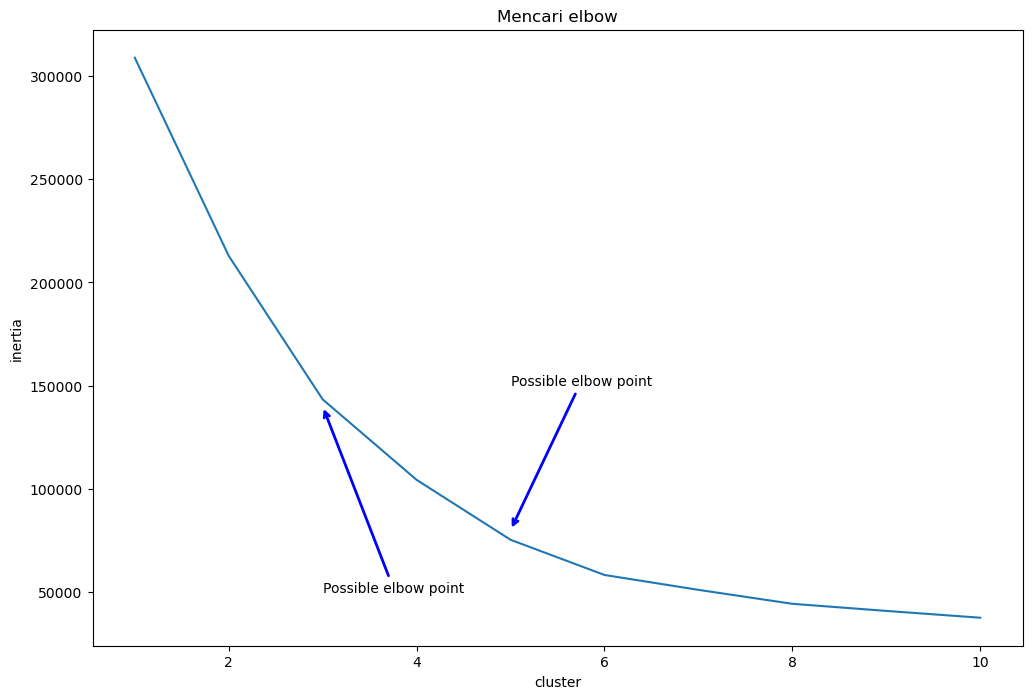

In [12]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters = i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = list(range(1,11)), y = clusters, ax = ax)
ax.set_title('Mencari elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')

# Panah elbow
ax.annotate('Possible elbow point', xy = (3, 140000), xytext = (3, 50000), xycoords='data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible elbow point', xy = (5, 80000), xytext = (5, 150000), xycoords='data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

# Proses clustering

In [13]:
n_clust = 4
kmean = KMeans(n_clusters = n_clust).fit(X)
X['Labels'] = kmean.labels_

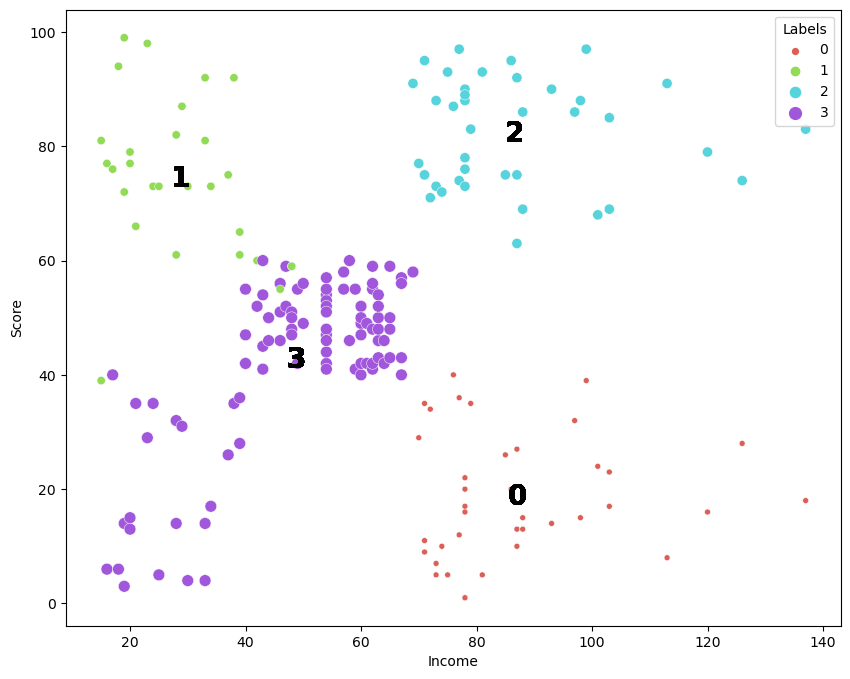

In [16]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = X['Labels'] ,x = X['Income'], y = X['Score'], hue = X['Labels'], markers = True, size = X['Labels'], palette = sns.color_palette('hls', n_clust))
# sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels']:
  plt.annotate(label, (X[X['Labels'] == label]['Income'].mean(),
                X[X['Labels'] == label]['Score'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight = 'bold',
                color = 'black')

In [17]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       1
1     21      15     81       1
2     20      16      6       3
3     23      16     77       1
4     31      17     40       3
..   ...     ...    ...     ...
195   35     120     79       2
196   45     126     28       0
197   32     126     74       2
198   32     137     18       0
199   30     137     83       2

[200 rows x 4 columns]


In [11]:
X.to_excel('output_cluster.xlsx')